In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as py 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Import data
indices_data = Path('Datasets/INDICES_DATA.csv', low_memory=False)
covid_data = Path('Datasets/owid-covid-data.csv')

#Read in data
indices_data_df = pd.read_csv(indices_data)
covid_data_df = pd.read_csv(covid_data)

/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/4284616870.py:6: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,36,37,38,39,40,41,43,44,45,46,47,48,50,51,52,53,54,55,57,58,59,60,61,62,64,65,66,67,68,69,71,72,73,74,75,76,78,79,80,81,82,83,85,86,87,88,89,90,92,93,94,95,96,97,99,100,101,102,103,104,106,107,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,127,128,129,130,131,132,134,135,136,137,138,139,141,142,143,144,145,146,148,149,150,151,152,153,155,156,157,158,159,160,162,163,164,165,166,167,169,170,171,172,173,174,176,177,178,179,180,181,183,184,185,186,187,188,190,191,192,193,194,195,197,198,199,200,201,202,204,205,206,207,208,209,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  indices_data_df = pd.read_csv(indices_data)


In [5]:
indices_data_df.head()

,Unnamed: 0,^GSPC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,^IXIC,Unnamed: 9,...,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,^JN0U.JO,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230
0,Date,High,Low,Open,Close,Volume,Adj Close,NaN,High,Low,...,Close,Volume,Adj Close,NaN,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,NaN,1291.880005,1285.449951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,NaN,1293.630005,1272.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,NaN,1310.839966,1280.699951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,NaN,1321.469971,1310.630005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


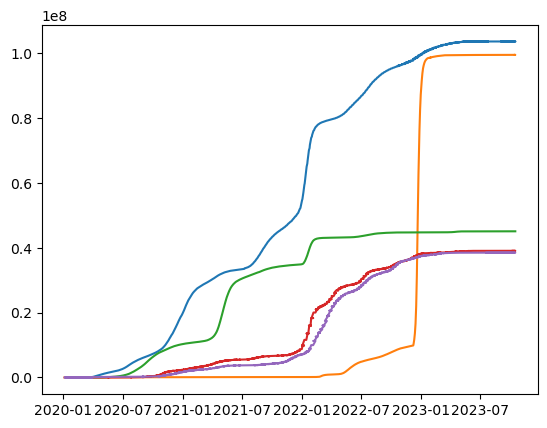

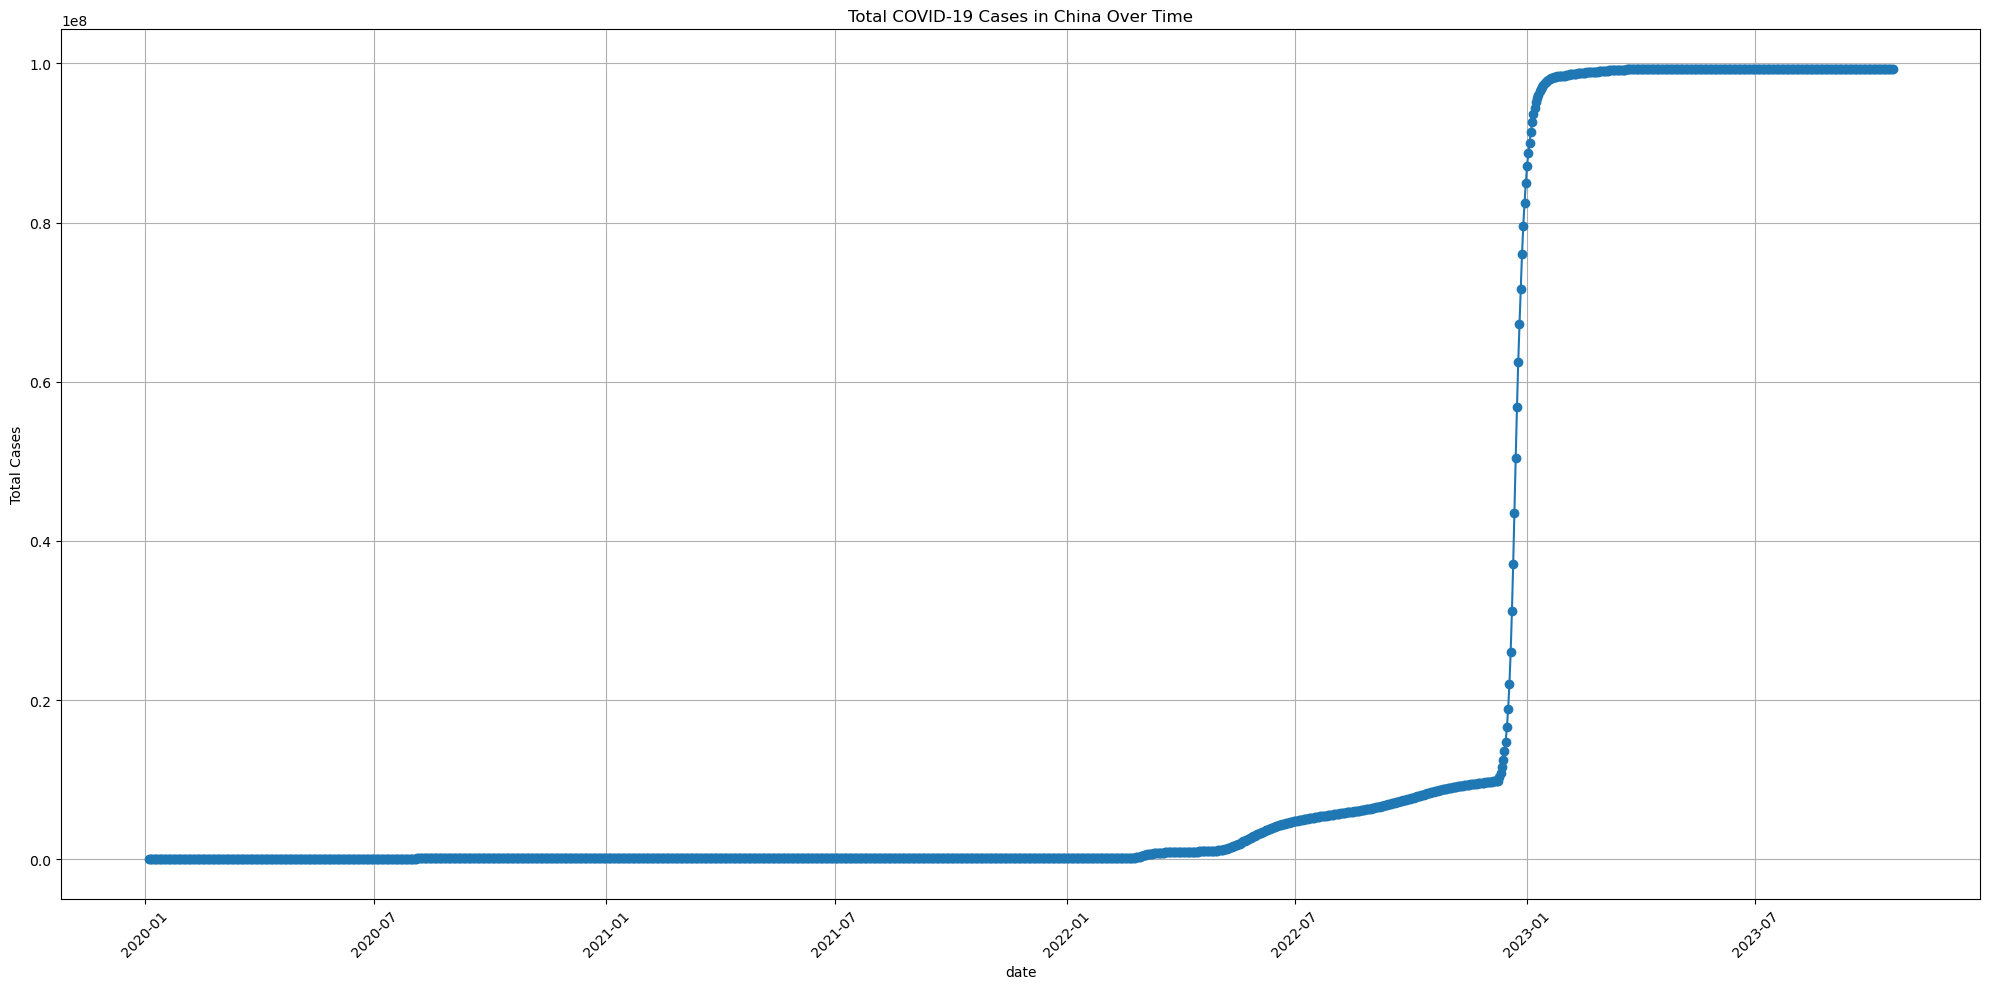

In [60]:


plt.plot(us_data['date'], us_data['total_cases'], label='USA')
plt.plot(china_data['date'], china_data['total_cases'], label='China')
plt.plot(india_data['date'], india_data['total_cases'], label='India')
plt.plot(france_data['date'], france_data['total_cases'], label='France')
plt.plot(germany_data['date'], germany_data['total_cases'], label='Germany')


plt.figure(figsize=(20, 10))
plt.plot(china_data["date"], china_data["total_cases"], marker='o', linestyle='-')
plt.xlabel('date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases in China Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
#Make the first row of the indices dataframe the headers
new_header = indices_data_df.iloc[0]
indices_data_df = indices_data_df[1:]
indices_data_df.columns = new_header

indices_data_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,NaN,High,Low,...,Close,Volume,Adj Close,NaN,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902,NaN,1291.880005,1285.449951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098,NaN,1293.630005,1272.339966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293,NaN,1310.839966,1280.699951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244,NaN,1321.469971,1310.630005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805,NaN,1327.819946,1312.079956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#USA- S&P 500 dataset creation
snp_df = indices_data_df.iloc[:, :7]
snp_df.head(30)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,753.9500122,740.7399902,753.8499756,740.7399902,399760000,740.7399902
2,1/2/1997,742.8099976,729.5499878,740.7399902,737.0100098,463230000,737.0100098
3,1/3/1997,748.2399902,737.0100098,737.0100098,748.0300293,452970000,748.0300293
4,1/6/1997,753.3099976,743.8200073,748.0300293,747.6500244,531350000,747.6500244
5,1/7/1997,753.2600098,742.1799927,747.6500244,753.2299805,538220000,753.2299805
6,1/8/1997,755.7199707,747.710022,753.2299805,748.4099731,557510000,748.4099731
7,1/9/1997,757.6799927,748.4099731,748.4099731,754.8499756,555370000,754.8499756
8,1/10/1997,759.6500244,746.9199829,754.8499756,759.5,545850000,759.5
9,1/13/1997,762.8499756,756.6900024,759.5,759.5100098,445400000,759.5100098
10,1/14/1997,772.039978,759.5100098,759.5100098,768.8599854,531600000,768.8599854


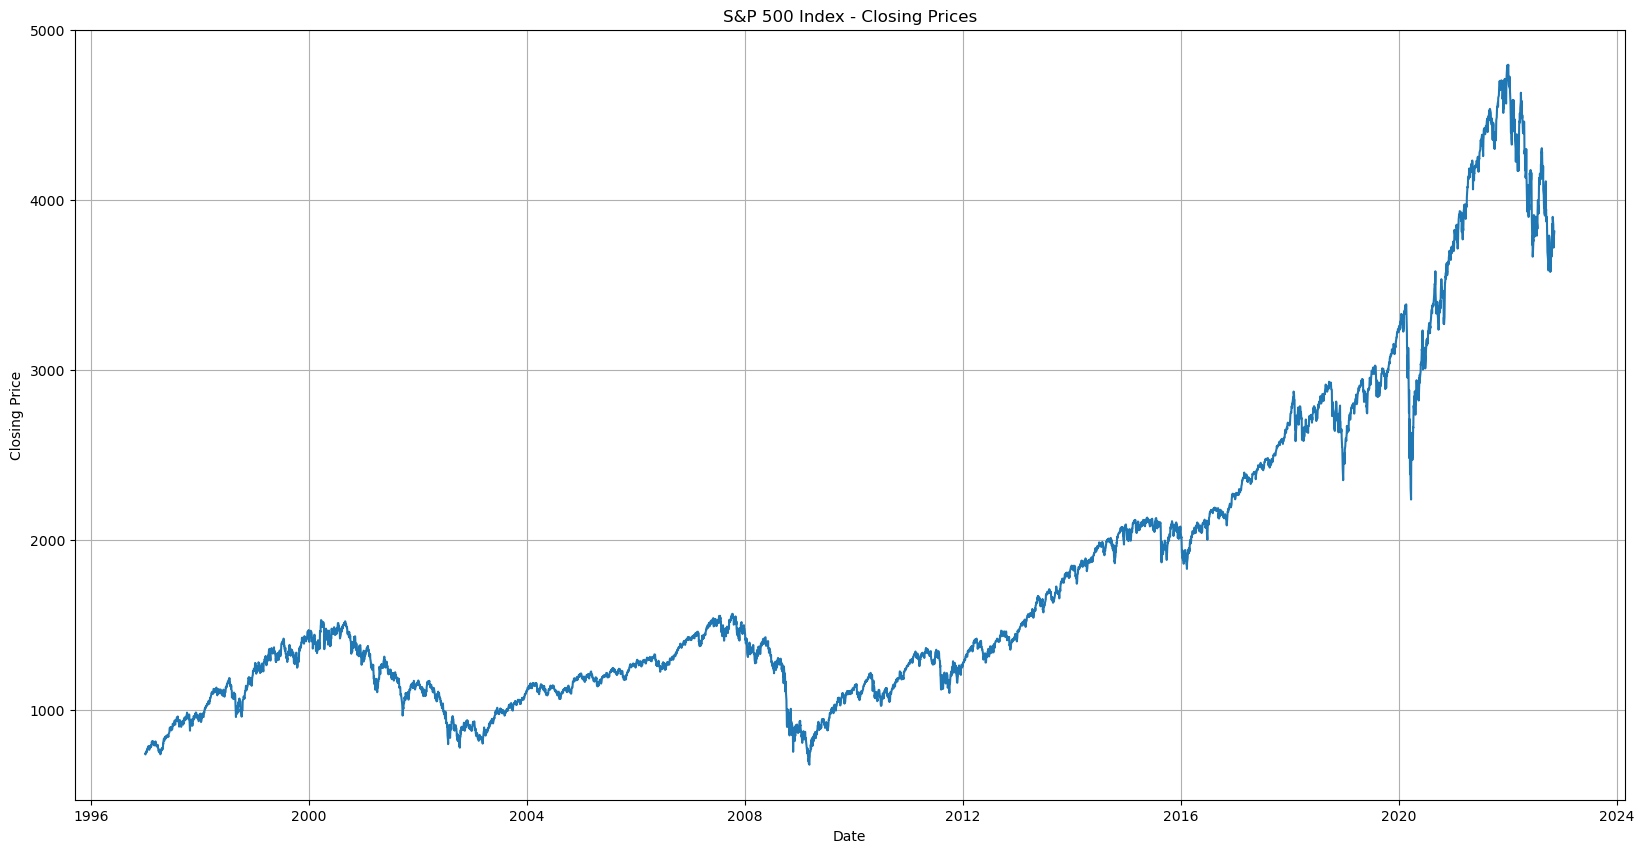

In [10]:
snp_df['Date'] = pd.to_datetime(snp_df['Date'])
snp_df['Close'] = snp_df['Close'].astype(float)
plt.figure(figsize=(20,10))
x = snp_df['Date']
y = snp_df['Close']
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Index - Closing Prices')
plt.grid(True)
plt.show()

In [11]:
# clean the covid dataframe
covid_data_df = covid_data_df[["location", "date", "total_cases", "total_deaths", "population"]]
covid_data_df = covid_data_df.sort_values(by='total_cases', ascending=False)
covid_data_df.head(10)

,location,date,total_cases,total_deaths,population
345826,World,2023-10-17,771407061.0,6972139.0,7.975105e+09
345824,World,2023-10-15,771407061.0,6972139.0,7.975105e+09
345827,World,2023-10-18,771407061.0,6972139.0,7.975105e+09
345825,World,2023-10-16,771407061.0,6972139.0,7.975105e+09
345823,World,2023-10-14,771405394.0,6972084.0,7.975105e+09
345822,World,2023-10-13,771404217.0,6972080.0,7.975105e+09
345821,World,2023-10-12,771401265.0,6972045.0,7.975105e+09
345820,World,2023-10-11,771391354.0,6972019.0,7.975105e+09
345819,World,2023-10-10,771378834.0,6971988.0,7.975105e+09
345818,World,2023-10-09,771351375.0,6971877.0,7.975105e+09


In [12]:
us_data = covid_data_df[covid_data_df["location"] == "United States"]
us_data.head()



,location,date,total_cases,total_deaths,population
330735,United States,2023-09-05,103436829.0,1132837.0,338289856.0
330755,United States,2023-09-25,103436829.0,1135328.0,338289856.0
330622,United States,2023-05-15,103436829.0,1127152.0,338289856.0
330734,United States,2023-09-04,103436829.0,1131593.0,338289856.0
330623,United States,2023-05-16,103436829.0,1127152.0,338289856.0


In [13]:
china_data = covid_data_df[covid_data_df["location"] == "China"]
china_data.head()

,location,date,total_cases,total_deaths,population
62325,China,2023-10-17,99315684.0,121742.0,1.425887e+09
62326,China,2023-10-18,99315684.0,121742.0,1.425887e+09
62323,China,2023-10-15,99315684.0,121742.0,1.425887e+09
62324,China,2023-10-16,99315684.0,121742.0,1.425887e+09
62322,China,2023-10-14,99315684.0,121742.0,1.425887e+09


In [14]:
india_data = covid_data_df[covid_data_df["location"] == "India"]
india_data.head()


,location,date,total_cases,total_deaths,population
141114,India,2023-10-18,44999588.0,532037.0,1.417173e+09
141113,India,2023-10-17,44999588.0,532037.0,1.417173e+09
141112,India,2023-10-16,44999588.0,532037.0,1.417173e+09
141111,India,2023-10-15,44999588.0,532037.0,1.417173e+09
141110,India,2023-10-14,44999561.0,532037.0,1.417173e+09


In [15]:
france_data = covid_data_df[covid_data_df["location"] == "France"]
france_data.head()


,location,date,total_cases,total_deaths,population
106557,France,2023-10-10,38997490.0,167985.0,67813000.0
106561,France,2023-10-14,38997490.0,167985.0,67813000.0
106562,France,2023-10-15,38997490.0,167985.0,67813000.0
106563,France,2023-10-16,38997490.0,167985.0,67813000.0
106560,France,2023-10-13,38997490.0,167985.0,67813000.0


In [16]:
germany_data = covid_data_df[covid_data_df["location"] == "Germany"]
germany_data.head()

,location,date,total_cases,total_deaths,population
114787,Germany,2023-07-22,38437756.0,174979.0,83369840.0
114793,Germany,2023-07-28,38437756.0,174979.0,83369840.0
114864,Germany,2023-10-07,38437756.0,174979.0,83369840.0
114865,Germany,2023-10-08,38437756.0,174979.0,83369840.0
114792,Germany,2023-07-27,38437756.0,174979.0,83369840.0


In [17]:
#Average of total Covid cases for top 5 highest countries

mean_total_us_cases = us_data["total_cases"].mean()
print("Mean total cases in the United States are")
print(mean_total_us_cases)

mean_total_china_cases = china_data["total_cases"].mean()
print("Mean total cases in China are")
print(mean_total_china_cases)

mean_total_india_cases = india_data["total_cases"].mean()
print("Mean total cases in India are")
print(mean_total_india_cases)

mean_total_france_cases = france_data["total_cases"].mean()
print("Mean total cases in France are")
print(mean_total_france_cases)

mean_total_germany_cases = germany_data["total_cases"].mean()
print("Mean total cases in Germany are")
print(mean_total_germany_cases)


Mean total cases in the United States are
55614949.33479532
Mean total cases in China are
22526494.28468208
Mean total cases in India are
28798366.00294551
Mean total cases in France are
17568720.02790015
Mean total cases in Germany are
16039188.98265896


/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/864160446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/864160446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data['date'] = pd.to_datetime(china_data['date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/864160446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

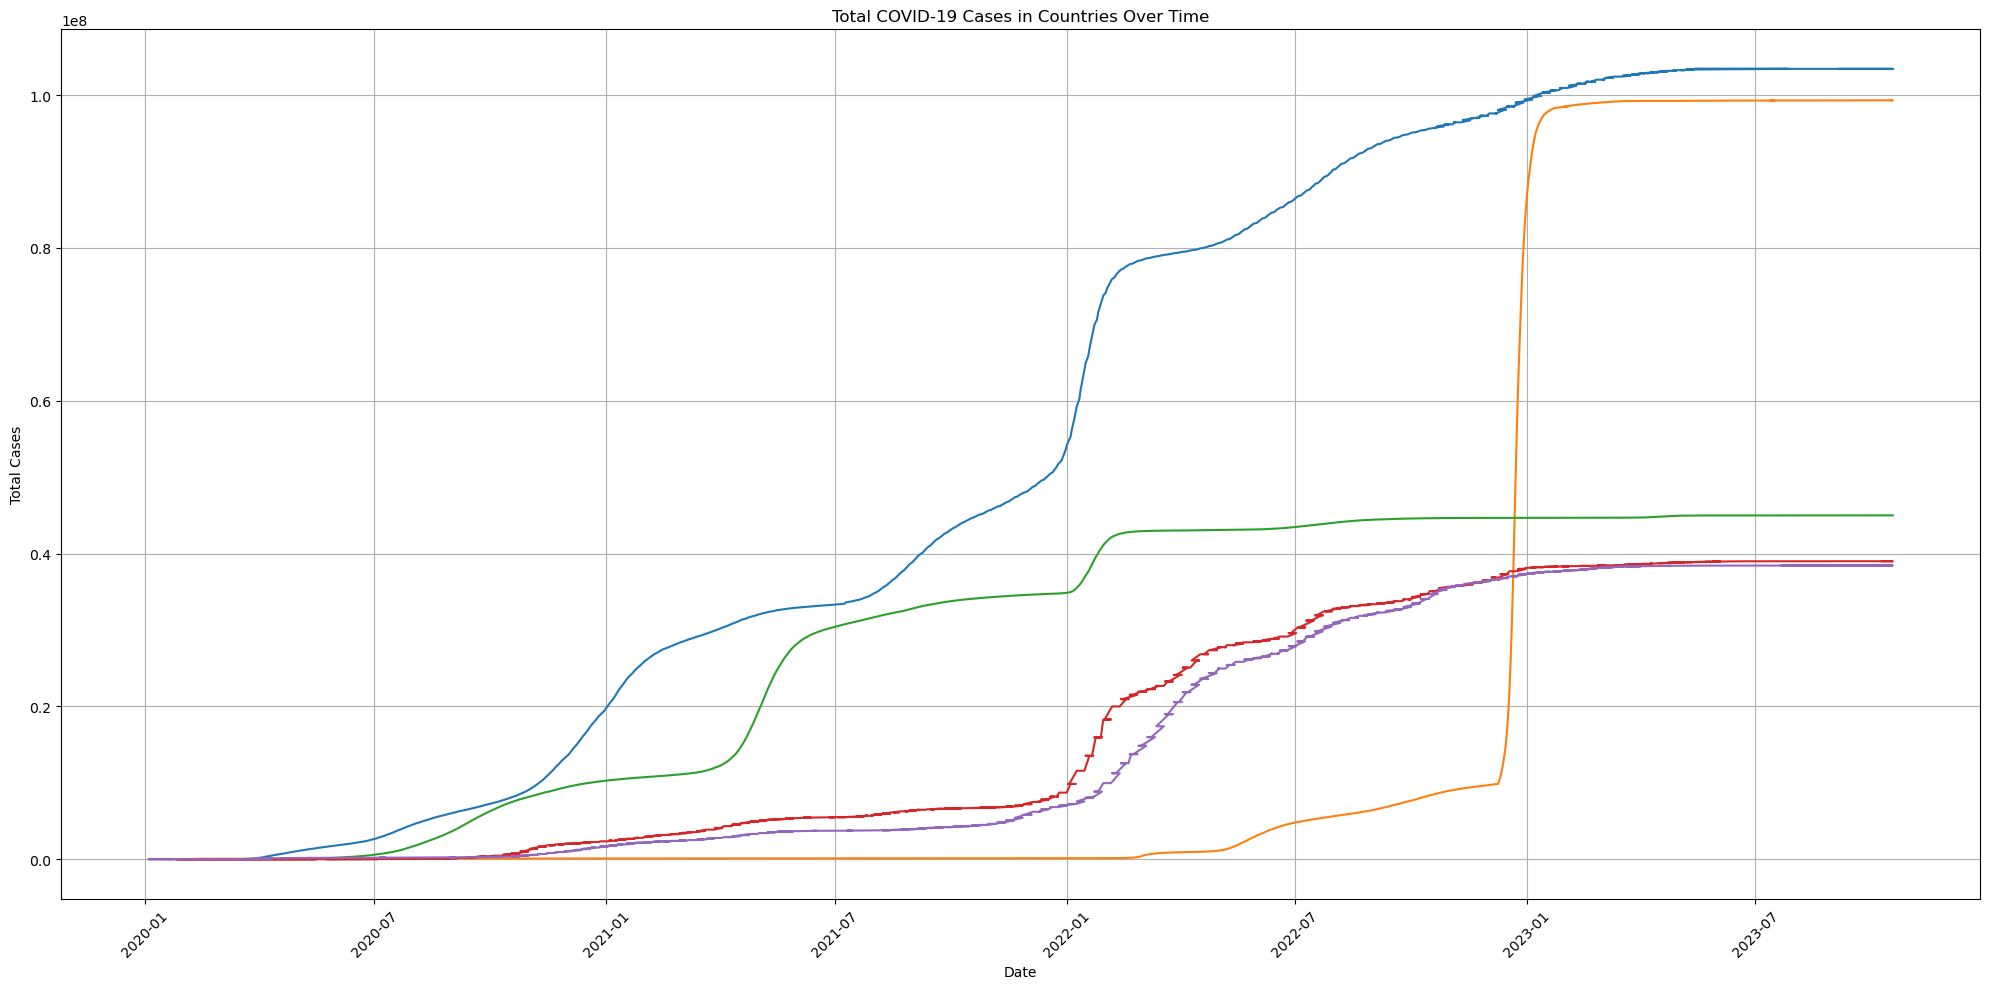

In [18]:
#Graph Total cases for each country

us_data['date'] = pd.to_datetime(us_data['date'])
china_data['date'] = pd.to_datetime(china_data['date'])
india_data['date'] = pd.to_datetime(india_data['date'])
france_data['date'] = pd.to_datetime(france_data['date'])
germany_data['date'] = pd.to_datetime(germany_data['date'])

plt.figure(figsize=(20, 10))
plt.plot(us_data['date'], us_data['total_cases'], label='USA')
plt.plot(china_data['date'], china_data['total_cases'], label='China')
plt.plot(india_data['date'], india_data['total_cases'], label='India')
plt.plot(france_data['date'], france_data['total_cases'], label='France')
plt.plot(germany_data['date'], germany_data['total_cases'], label='Germany')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases in Countries Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# groupby total cases by country
total_cases_by_country = covid_data_df.groupby('location')['total_cases'].max().sort_values(ascending=False)
top_10_countries = total_cases_by_country.head(10).reset_index()
top_10_countries.head(30)

,location,total_cases
0,World,771407061.0
1,High income,425988398.0
2,Asia,300681974.0
3,Europe,249783754.0
4,Upper middle income,244463792.0
5,European Union,184210531.0
6,North America,124492151.0
7,United States,103436829.0
8,China,99315684.0
9,Lower middle income,97458491.0


In [20]:
# count the amount of entries for each country
countries = covid_data_df['location'].value_counts(dropna=False)
print(countries)


location
Argentina          1387
Mexico             1387
Sweden             1386
Czechia            1386
Netherlands        1386
                   ... 
England            1303
Wales              1198
Macao               795
Northern Cyprus     691
Western Sahara        1
Name: count, Length: 255, dtype: int64


In [21]:
# single out location and population
location_population = covid_data_df[['location', 'population']]
location_population

,location,population
345826,World,7.975105e+09
345824,World,7.975105e+09
345827,World,7.975105e+09
345825,World,7.975105e+09
345823,World,7.975105e+09
...,...,...
348671,Zimbabwe,1.632054e+07
348672,Zimbabwe,1.632054e+07
348673,Zimbabwe,1.632054e+07
348674,Zimbabwe,1.632054e+07


In [22]:
# groupby location and population
location_population_max = location_population.groupby('location').max()
location_population_max

,population
location,
Afghanistan,4.112877e+07
Africa,1.426737e+09
Albania,2.842318e+06
Algeria,4.490323e+07
American Samoa,4.429500e+04
...,...
Western Sahara,5.760050e+05
World,7.975105e+09
Yemen,3.369661e+07


In [23]:
# sort population
location_population_max = location_population_max.sort_values('population', ascending=False)
location_population_max

,population
location,
World,7.975105e+09
Asia,4.721383e+09
Lower middle income,3.432097e+09
Upper middle income,2.525921e+09
Africa,1.426737e+09
...,...
Falkland Islands,3.801000e+03
Niue,1.952000e+03
Tokelau,1.893000e+03


In [24]:
# drop unneeded columns
location_population_max = location_population_max.drop('Lower middle income')
location_population_max = location_population_max.drop('Upper middle income')
location_population_max = location_population_max.drop('World')
location_population_max = location_population_max.drop('Asia')
location_population_max = location_population_max.drop('Africa')
location_population_max = location_population_max.drop('High income')
location_population_max = location_population_max.drop('Low income')
location_population_max = location_population_max.drop('European Union')
location_population_max = location_population_max.drop('North America')
location_population_max.head(30)

,population
location,
China,1.425887e+09
India,1.417173e+09
Europe,7.448078e+08
South America,4.368167e+08
United States,3.382899e+08
Indonesia,2.755013e+08
Pakistan,2.358249e+08
Nigeria,2.185412e+08
Brazil,2.153135e+08


In [25]:
# drop unneeded rows and group by location, total cases, date
total_cases = covid_data_df[['location', 'total_cases', 'date']]
total_cases_max = total_cases.groupby('location').max()
total_cases_max = total_cases_max.sort_values('total_cases', ascending=False)
total_cases_max = total_cases_max.drop('Lower middle income',)
total_cases_max = total_cases_max.drop('Upper middle income')
total_cases_max = total_cases_max.drop('World')
total_cases_max = total_cases_max.drop('Asia')
total_cases_max = total_cases_max.drop('Africa')
total_cases_max = total_cases_max.drop('High income')
total_cases_max = total_cases_max.drop('Low income')
total_cases_max = total_cases_max.drop('European Union')
total_cases_max = total_cases_max.drop('North America')
total_cases_max = total_cases_max.drop('Europe')
total_cases_max = total_cases_max.drop('South America')
total_cases_max.head(40)

,total_cases,date
location,,
United States,103436829.0,2023-10-18
China,99315684.0,2023-10-18
India,44999588.0,2023-10-18
France,38997490.0,2023-10-18
Germany,38437756.0,2023-10-18
Brazil,37721749.0,2023-10-18
South Korea,34571873.0,2023-10-18
Japan,33803572.0,2023-10-18
Italy,26168412.0,2023-10-18


In [26]:
# convert date to datetime
total_cases_max['date'] = pd.to_datetime(total_cases_max['date'])
print(total_cases_max.dtypes)
total_cases_max.head()

total_cases           float64
date           datetime64[ns]
dtype: object


,total_cases,date
location,,
United States,103436829.0,2023-10-18
China,99315684.0,2023-10-18
India,44999588.0,2023-10-18
France,38997490.0,2023-10-18
Germany,38437756.0,2023-10-18


In [27]:
# index by date
total_cases_max = total_cases_max.reset_index()
date_total_cases = total_cases_max.set_index('date')
date_total_cases.head(10)

,location,total_cases
date,,
2023-10-18,United States,103436829.0
2023-10-18,China,99315684.0
2023-10-18,India,44999588.0
2023-10-18,France,38997490.0
2023-10-18,Germany,38437756.0
2023-10-18,Brazil,37721749.0
2023-10-18,South Korea,34571873.0
2023-10-18,Japan,33803572.0
2023-10-18,Italy,26168412.0


In [28]:
#China - SSE Composite Index dataset as a subset of the indices dataframe 
sse_df = indices_data_df.iloc[:, [0] + list(range(113,119))]
sse_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/1997,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
126,6/30/1997,NaN,NaN,NaN,NaN,NaN,NaN
127,7/1/1997,NaN,NaN,NaN,NaN,NaN,NaN
128,7/2/1997,1261.571045,1147.331055,1255.909058,1199.061035,0,1199.061035
129,7/3/1997,1194.676025,1149.939941,1194.676025,1150.623047,0,1150.623047


In [29]:
#India - S&P BSE SENSEX dataset as a subset of the indices dataframe 
bse_df = indices_data_df.iloc[:, [0] + list(range(141,147))]
bse_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,NaN,NaN,NaN,NaN,NaN,NaN
3,1/3/1997,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1997,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/1997,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
126,6/30/1997,NaN,NaN,NaN,NaN,NaN,NaN
127,7/1/1997,4301.77002,4247.660156,4263.109863,4300.859863,0,4300.859863
128,7/2/1997,4395.310059,4295.399902,4302.959961,4333.899902,0,4333.899902
129,7/3/1997,4393.290039,4299.970215,4335.790039,4323.459961,0,4323.459961


In [30]:
#France - CAC 40 dataset as a subset of the indices dataframe 
cac_df = indices_data_df.iloc[:, [0] + list(range(64,70))]
cac_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,2328.199951,2302.100098,2323.899902,2315.699951,0,2315.699951
2,1/2/1997,2305.899902,2251.5,2305.899902,2257,0,2257
3,1/3/1997,2285.5,2259.5,2265.600098,2282.800049,0,2282.800049
4,1/6/1997,2309.899902,2294.800049,2309.899902,2306.699951,0,2306.699951
5,1/7/1997,2315.300049,2294,2301.399902,2301.699951,0,2301.699951
...,...,...,...,...,...,...,...
126,6/30/1997,2896.699951,2858.300049,2884.5,2858.300049,0,2858.300049
127,7/1/1997,2944,2866,2866.100098,2944,0,2944
128,7/2/1997,2986.100098,2879.600098,2947.600098,2909.5,0,2909.5
129,7/3/1997,2949.699951,2908.399902,2926.5,2937,0,2937


In [31]:
#Germany - DAX Performance-Index dataset as a subset of the indices dataframe 
dax_df = indices_data_df.iloc[:, [0] + list(range(57,63))]
dax_df.head(130)

,Date,High,Low,Open,Close,Volume,Adj Close
1,12/31/1996,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1997,2850.939941,2815.5,2836.820068,2820.810059,0,2820.810059
3,1/3/1997,2863.280029,2833.610107,2836.620117,2863.26001,0,2863.26001
4,1/6/1997,2904.47998,2877.350098,2884.060059,2890.199951,0,2890.199951
5,1/7/1997,2885.219971,2869.060059,2883.129883,2876.340088,0,2876.340088
...,...,...,...,...,...,...,...
126,6/30/1997,3826.139893,3756.649902,3815.27002,3766.889893,0,3766.889893
127,7/1/1997,3835.840088,3782.590088,3782.709961,3834.840088,0,3834.840088
128,7/2/1997,3870.810059,3837.040039,3840.320068,3867.530029,0,3867.530029
129,7/3/1997,3944.340088,3870.570068,3882.47998,3939.72998,0,3939.72998


/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/1734681967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sse_df['Date'] = pd.to_datetime(sse_df['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/1734681967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bse_df['Date'] = pd.to_datetime(bse_df['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/1734681967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

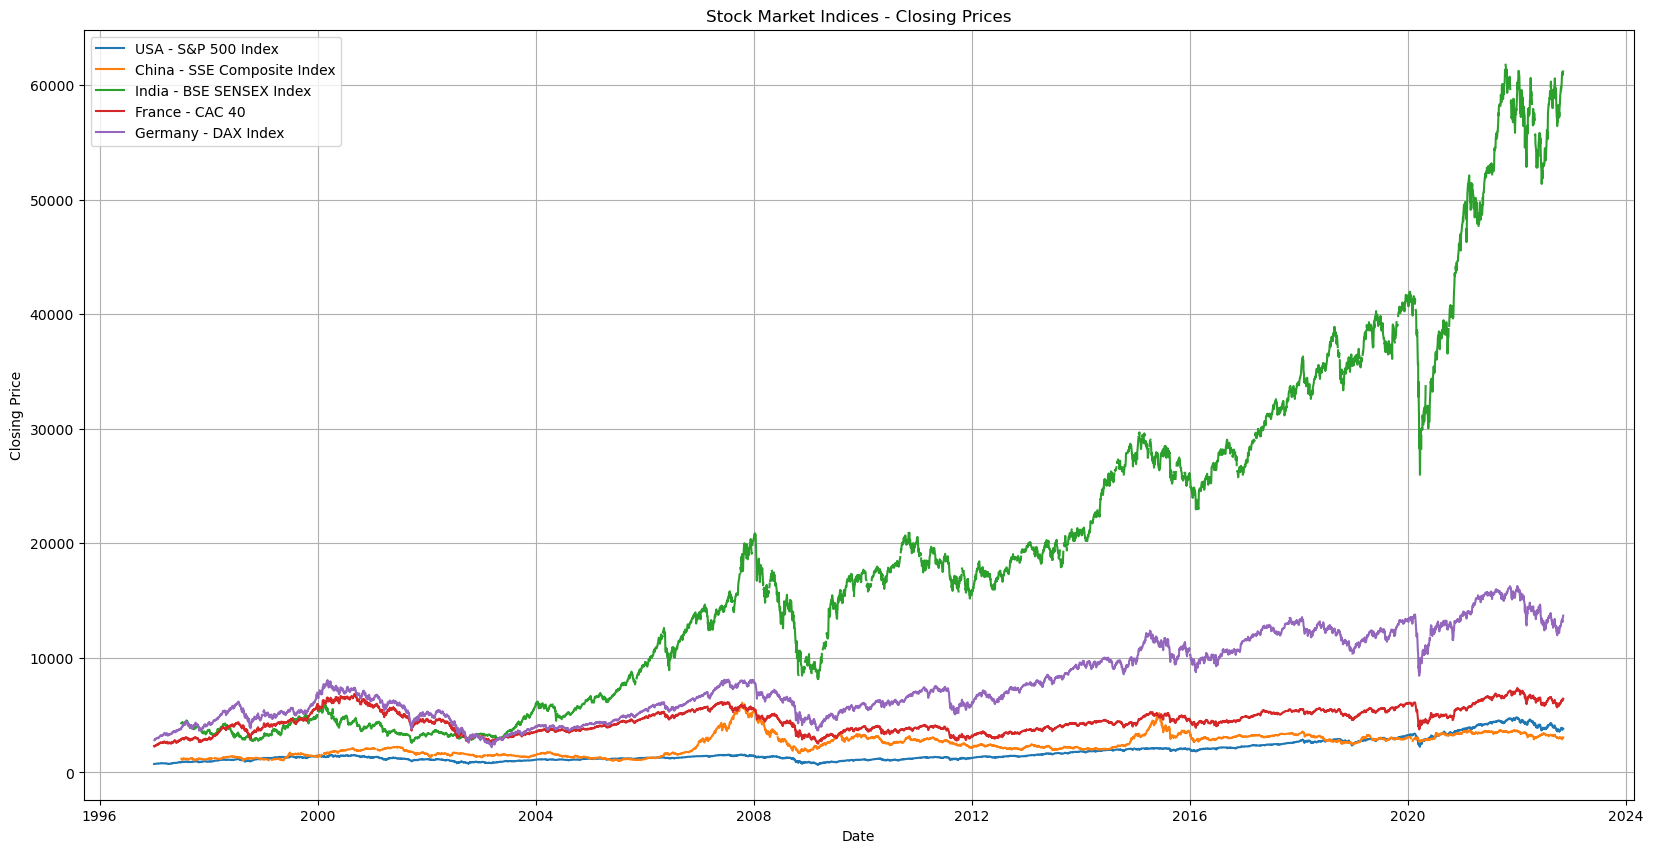

In [32]:
#Convert Date columns to datetime
snp_df['Date'] = pd.to_datetime(snp_df['Date'])
sse_df['Date'] = pd.to_datetime(sse_df['Date'])
bse_df['Date'] = pd.to_datetime(bse_df['Date'])
cac_df['Date'] = pd.to_datetime(cac_df['Date'])
dax_df['Date'] = pd.to_datetime(dax_df['Date'])

#Convert Close data to a float datatype
snp_df['Close'] = snp_df['Close'].astype(float)
sse_df['Close'] = sse_df['Close'].astype(float)
bse_df['Close'] = bse_df['Close'].astype(float)
cac_df['Close'] = cac_df['Close'].astype(float)
dax_df['Close'] = dax_df['Close'].astype(float)

#Plot the graph
plt.figure(figsize=(20,10))

#Plot the index dataframes
plt.plot(snp_df['Date'], snp_df['Close'], label='USA - S&P 500 Index')
plt.plot(sse_df['Date'], sse_df['Close'], label='China - SSE Composite Index')
plt.plot(bse_df['Date'], bse_df['Close'], label='India - BSE SENSEX Index')
plt.plot(cac_df['Date'], cac_df['Close'], label='France - CAC 40')
plt.plot(dax_df['Date'], dax_df['Close'], label='Germany - DAX Index')

#Create the graph details
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Market Indices - Closing Prices')
plt.grid(True)
plt.legend()
plt.show()

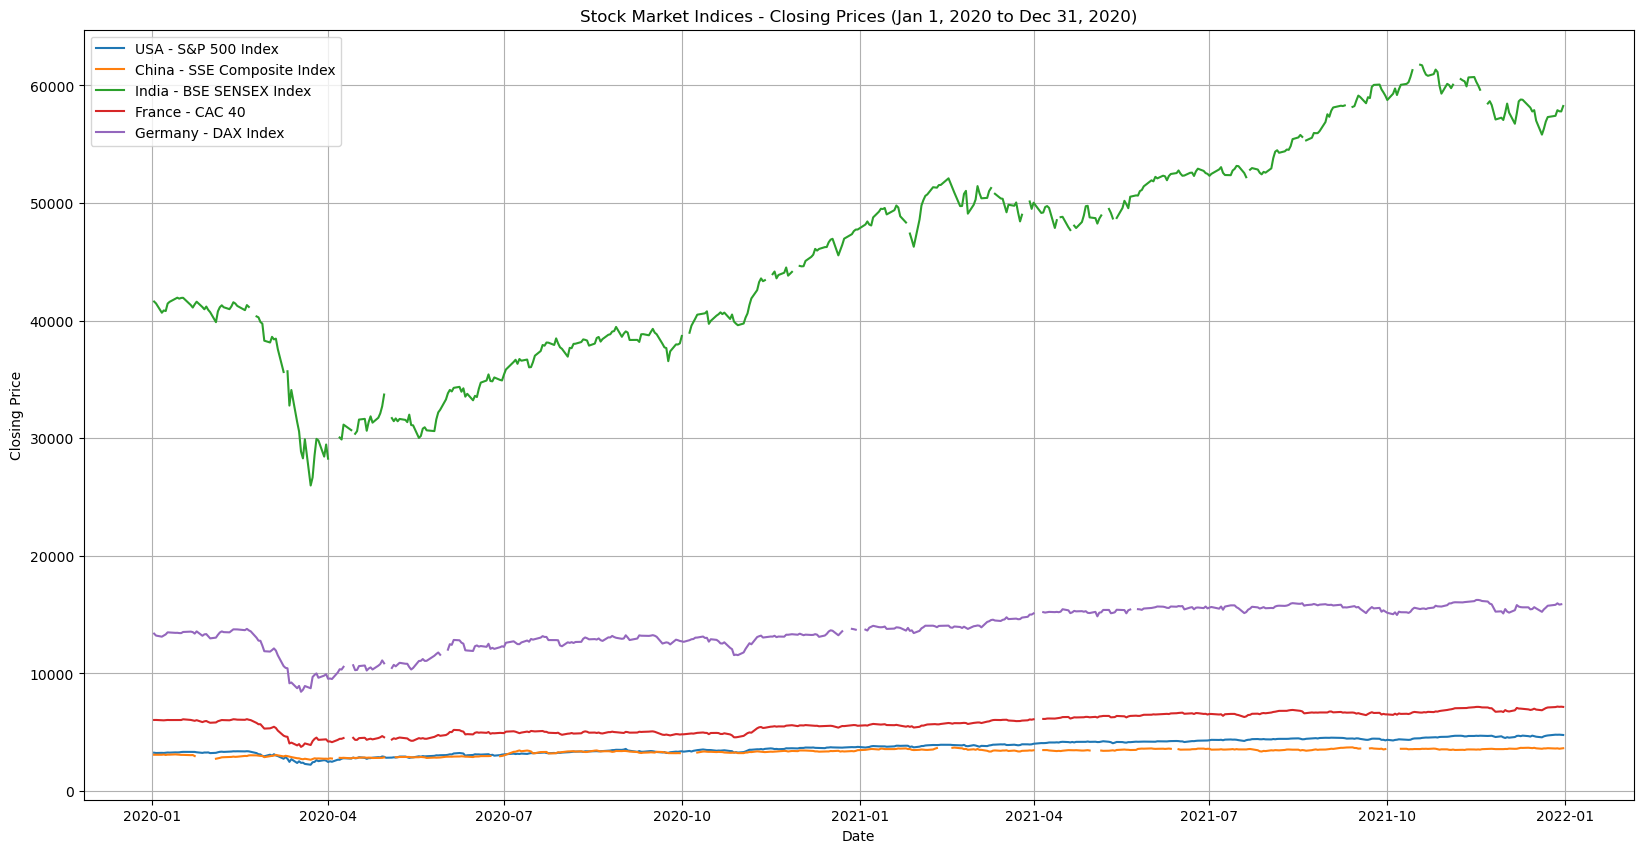

In [33]:
# Filter dataframes for a specific date range (e.g., January 1, 2023 to December 31, 2023)
start_date = '2020-01-01'
end_date = '2021-12-31'

snp_df_filtered = snp_df[(snp_df['Date'] >= start_date) & (snp_df['Date'] <= end_date)]
sse_df_filtered = sse_df[(sse_df['Date'] >= start_date) & (sse_df['Date'] <= end_date)]
bse_df_filtered = bse_df[(bse_df['Date'] >= start_date) & (bse_df['Date'] <= end_date)]
cac_df_filtered = cac_df[(cac_df['Date'] >= start_date) & (cac_df['Date'] <= end_date)]
dax_df_filtered = dax_df[(dax_df['Date'] >= start_date) & (dax_df['Date'] <= end_date)]

# Plot the graph
plt.figure(figsize=(20,10))

# Plot the index dataframes
plt.plot(snp_df_filtered['Date'], snp_df_filtered['Close'], label='USA - S&P 500 Index')
plt.plot(sse_df_filtered['Date'], sse_df_filtered['Close'], label='China - SSE Composite Index')
plt.plot(bse_df_filtered['Date'], bse_df_filtered['Close'], label='India - BSE SENSEX Index')
plt.plot(cac_df_filtered['Date'], cac_df_filtered['Close'], label='France - CAC 40')
plt.plot(dax_df_filtered['Date'], dax_df_filtered['Close'], label='Germany - DAX Index')

# Create the graph details
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Market Indices - Closing Prices (Jan 1, 2020 to Dec 31, 2020)')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
snp_df_filtered['Index'] = 'S&P 500'
sse_df_filtered['Index'] = 'SSE Composite Index'
bse_df_filtered['Index'] = 'BSE Sensex'
cac_df_filtered['Index'] = 'CAC 40'
dax_df_filtered['Index'] = 'DAX Performance'
filtered_merged_indices = pd.concat([snp_df_filtered,sse_df_filtered,bse_df_filtered,cac_df_filtered,dax_df_filtered], ignore_index=True)
filtered_merged_indices.head()

/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/2373936485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_df_filtered['Index'] = 'S&P 500'
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/2373936485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sse_df_filtered['Index'] = 'SSE Composite Index'
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/2373936485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Date,High,Low,Open,Close,Volume,Adj Close,Index
0,2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,S&P 500
1,2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,S&P 500
2,2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,S&P 500
3,2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,S&P 500
4,2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,S&P 500


In [35]:
#Mergining the indices dataframes
snp_df['Index'] = 'S&P 500'
sse_df['Index'] = 'SSE Composite Index'
bse_df['Index'] = 'BSE Sensex'
cac_df['Index'] = 'CAC 40'
dax_df['Index'] = 'DAX Performance'

/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3706265434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sse_df['Index'] = 'SSE Composite Index'
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3706265434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bse_df['Index'] = 'BSE Sensex'
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3706265434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [36]:
#merged indices dataframe
merged_indices_df = pd.concat([snp_df, sse_df,bse_df,cac_df,dax_df], ignore_index=True)
merged_indices_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Index
0,1996-12-31,753.9500122,740.7399902,753.8499756,740.739990,399760000,740.7399902,S&P 500
1,1997-01-02,742.8099976,729.5499878,740.7399902,737.010010,463230000,737.0100098,S&P 500
2,1997-01-03,748.2399902,737.0100098,737.0100098,748.030029,452970000,748.0300293,S&P 500
3,1997-01-06,753.3099976,743.8200073,748.0300293,747.650024,531350000,747.6500244,S&P 500
4,1997-01-07,753.2600098,742.1799927,747.6500244,753.229981,538220000,753.2299805,S&P 500


In [37]:
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])
covid_data_df.head()

,location,date,total_cases,total_deaths,population
345826,World,2023-10-17,771407061.0,6972139.0,7.975105e+09
345824,World,2023-10-15,771407061.0,6972139.0,7.975105e+09
345827,World,2023-10-18,771407061.0,6972139.0,7.975105e+09
345825,World,2023-10-16,771407061.0,6972139.0,7.975105e+09
345823,World,2023-10-14,771405394.0,6972084.0,7.975105e+09


In [38]:
covid_data_df = covid_data_df.rename(columns={
    'date':             'Date',
    'location':         'Location',
    'total_cases':      'Total Cases',
    'total_deaths':     'Total Deaths',
    'population':       'Population'
})
covid_data_df.head()

,Location,Date,Total Cases,Total Deaths,Population
345826,World,2023-10-17,771407061.0,6972139.0,7.975105e+09
345824,World,2023-10-15,771407061.0,6972139.0,7.975105e+09
345827,World,2023-10-18,771407061.0,6972139.0,7.975105e+09
345825,World,2023-10-16,771407061.0,6972139.0,7.975105e+09
345823,World,2023-10-14,771405394.0,6972084.0,7.975105e+09


In [39]:
date_total_cases = date_total_cases.reset_index().rename(columns={
    'date':             'Date',
    'location':         'Location',
    'total_cases':      'Total Cases'
})
date_total_cases.head()

,Date,Location,Total Cases
0,2023-10-18,United States,103436829.0
1,2023-10-18,China,99315684.0
2,2023-10-18,India,44999588.0
3,2023-10-18,France,38997490.0
4,2023-10-18,Germany,38437756.0


In [40]:
merged_indices_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Index
0,1996-12-31,753.9500122,740.7399902,753.8499756,740.739990,399760000,740.7399902,S&P 500
1,1997-01-02,742.8099976,729.5499878,740.7399902,737.010010,463230000,737.0100098,S&P 500
2,1997-01-03,748.2399902,737.0100098,737.0100098,748.030029,452970000,748.0300293,S&P 500
3,1997-01-06,753.3099976,743.8200073,748.0300293,747.650024,531350000,747.6500244,S&P 500
4,1997-01-07,753.2600098,742.1799927,747.6500244,753.229981,538220000,753.2299805,S&P 500


In [41]:
index_list = filtered_merged_indices['Index'].value_counts().index.tolist()

In [42]:
united_index = ['United States','China','India','France','Germany']

In [43]:
location_dict = dict(zip(index_list,united_index))
location_dict

{'S&P 500': 'United States',
 'SSE Composite Index': 'China',
 'BSE Sensex': 'India',
 'CAC 40': 'France',
 'DAX Performance': 'Germany'}

In [44]:
filtered_merged_indices['Location'] = filtered_merged_indices['Index'].apply(lambda x: location_dict[x])
filtered_merged_indices.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Index,Location
0,2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,S&P 500,United States
1,2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,S&P 500,United States
2,2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,S&P 500,United States
3,2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,S&P 500,United States
4,2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,S&P 500,United States


In [45]:
pd.set_option('display.max_rows', None)

In [46]:
merged_indices_and_covid = pd.merge(filtered_merged_indices, covid_data_df, on=['Date','Location'], how='left')
merged_indices_and_covid.head(50)

,Date,High,Low,Open,Close,Volume,Adj Close,Index,Location,Total Cases,Total Deaths,Population
0,2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,S&P 500,United States,NaN,NaN,NaN
1,2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,S&P 500,United States,NaN,NaN,338289856.0
2,2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,S&P 500,United States,NaN,NaN,338289856.0
3,2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,S&P 500,United States,NaN,NaN,338289856.0
4,2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,S&P 500,United States,NaN,NaN,338289856.0
5,2020-01-09,3275.580078,3263.669922,3266.030029,3274.699951,3638390000,3274.699951,S&P 500,United States,NaN,NaN,338289856.0
6,2020-01-10,3282.98999,3260.860107,3281.810059,3265.350098,3212970000,3265.350098,S&P 500,United States,NaN,NaN,338289856.0
7,2020-01-13,3288.129883,3268.429932,3271.129883,3288.129883,3456380000,3288.129883,S&P 500,United States,NaN,NaN,338289856.0
8,2020-01-14,3294.25,3277.189941,3285.350098,3283.149902,3665130000,3283.149902,S&P 500,United States,NaN,NaN,338289856.0
9,2020-01-15,3298.659912,3280.689941,3282.27002,3289.290039,3716840000,3289.290039,S&P 500,United States,NaN,NaN,338289856.0


/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/1915756759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/1915756759.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/1915756759.py:13: SettingWithCopyWarning: 
A value is t

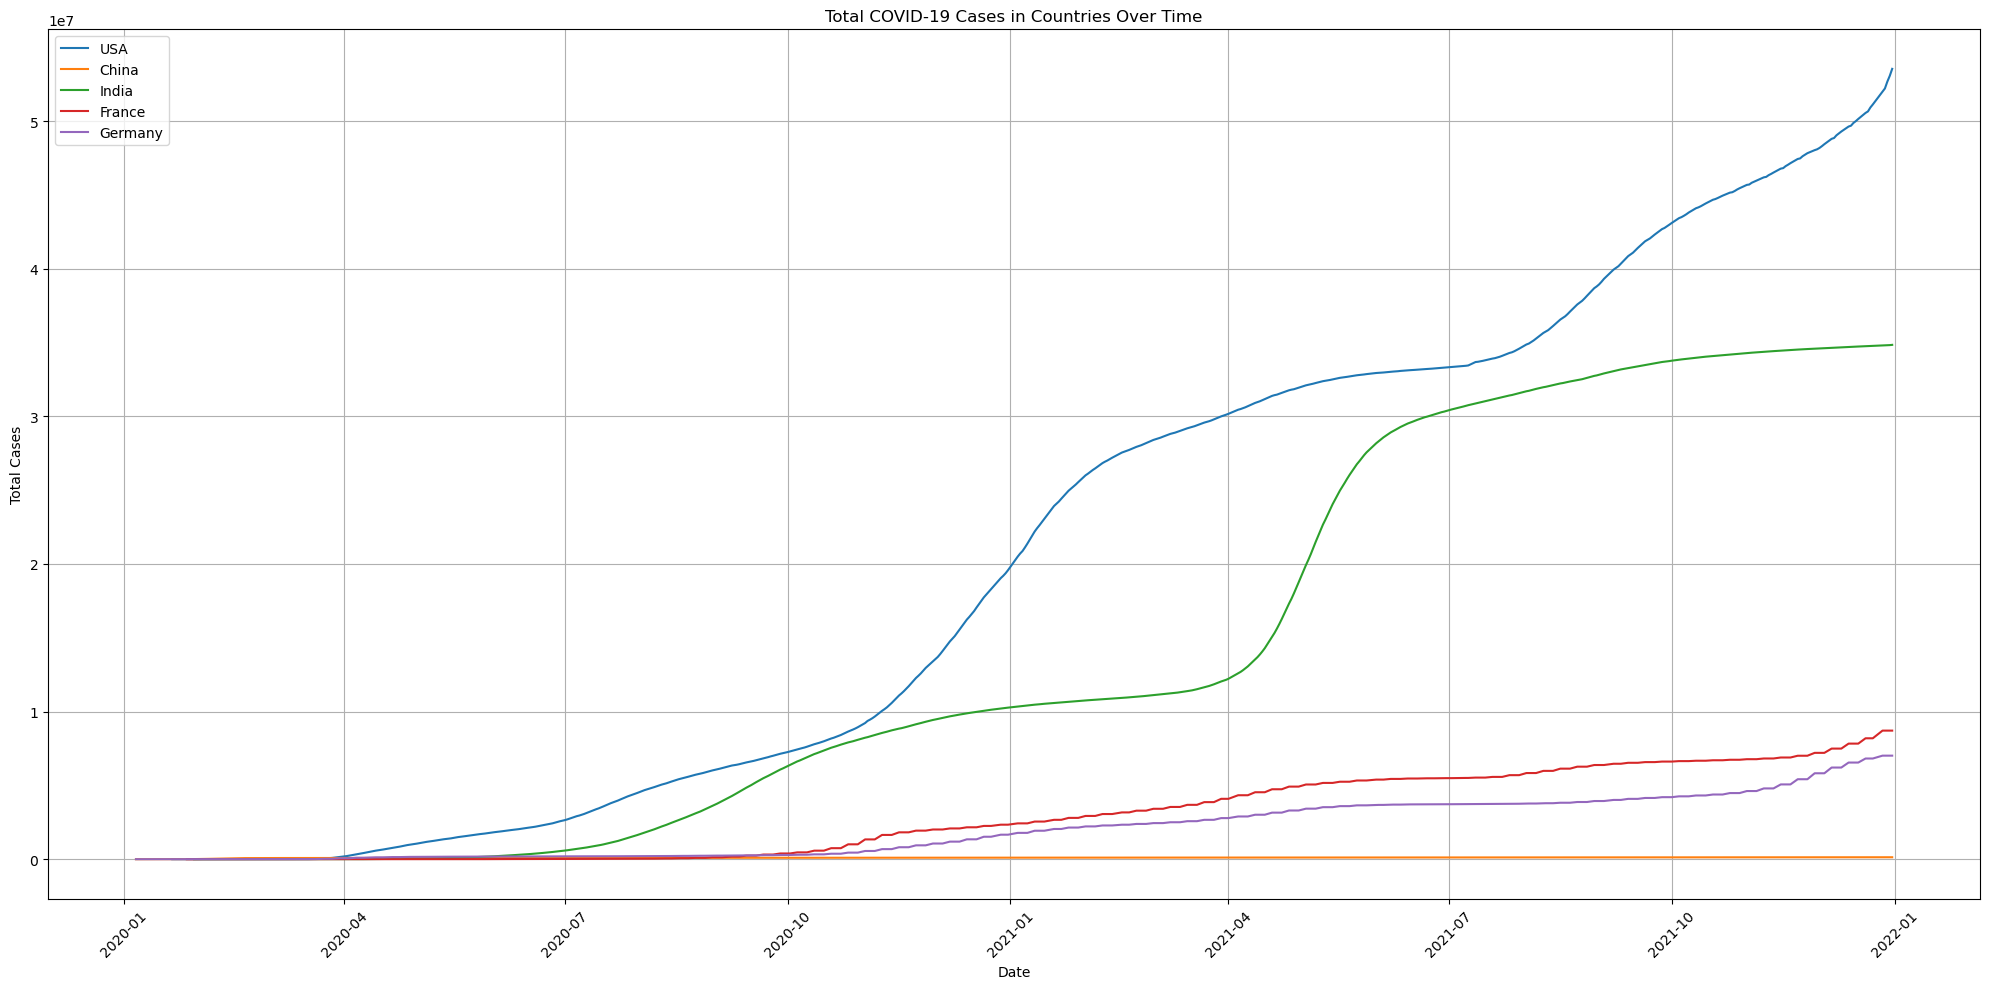

In [47]:
# Total Covid cases/country over time in scatter plot



us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
india_merged_data['Date'] = pd.to_datetime(india_merged_data['Date'])
france_merged_data['Date'] = pd.to_datetime(france_merged_data['Date'])
germany_merged_data['Date'] = pd.to_datetime(germany_merged_data['Date'])

plt.figure(figsize=(20, 10))
plt.plot(us_merged_data['Date'], us_merged_data['Total Cases'], label='USA')
plt.plot(china_merged_data['Date'], china_merged_data['Total Cases'], label='China')
plt.plot(india_merged_data['Date'], india_merged_data['Total Cases'], label='India')
plt.plot(france_merged_data['Date'], france_merged_data['Total Cases'], label='France')
plt.plot(germany_merged_data['Date'], germany_merged_data['Total Cases'], label='Germany')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases in Countries Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3182005601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3182005601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3182005601.py:11: SettingWithCopyWarning: 
A value is tr

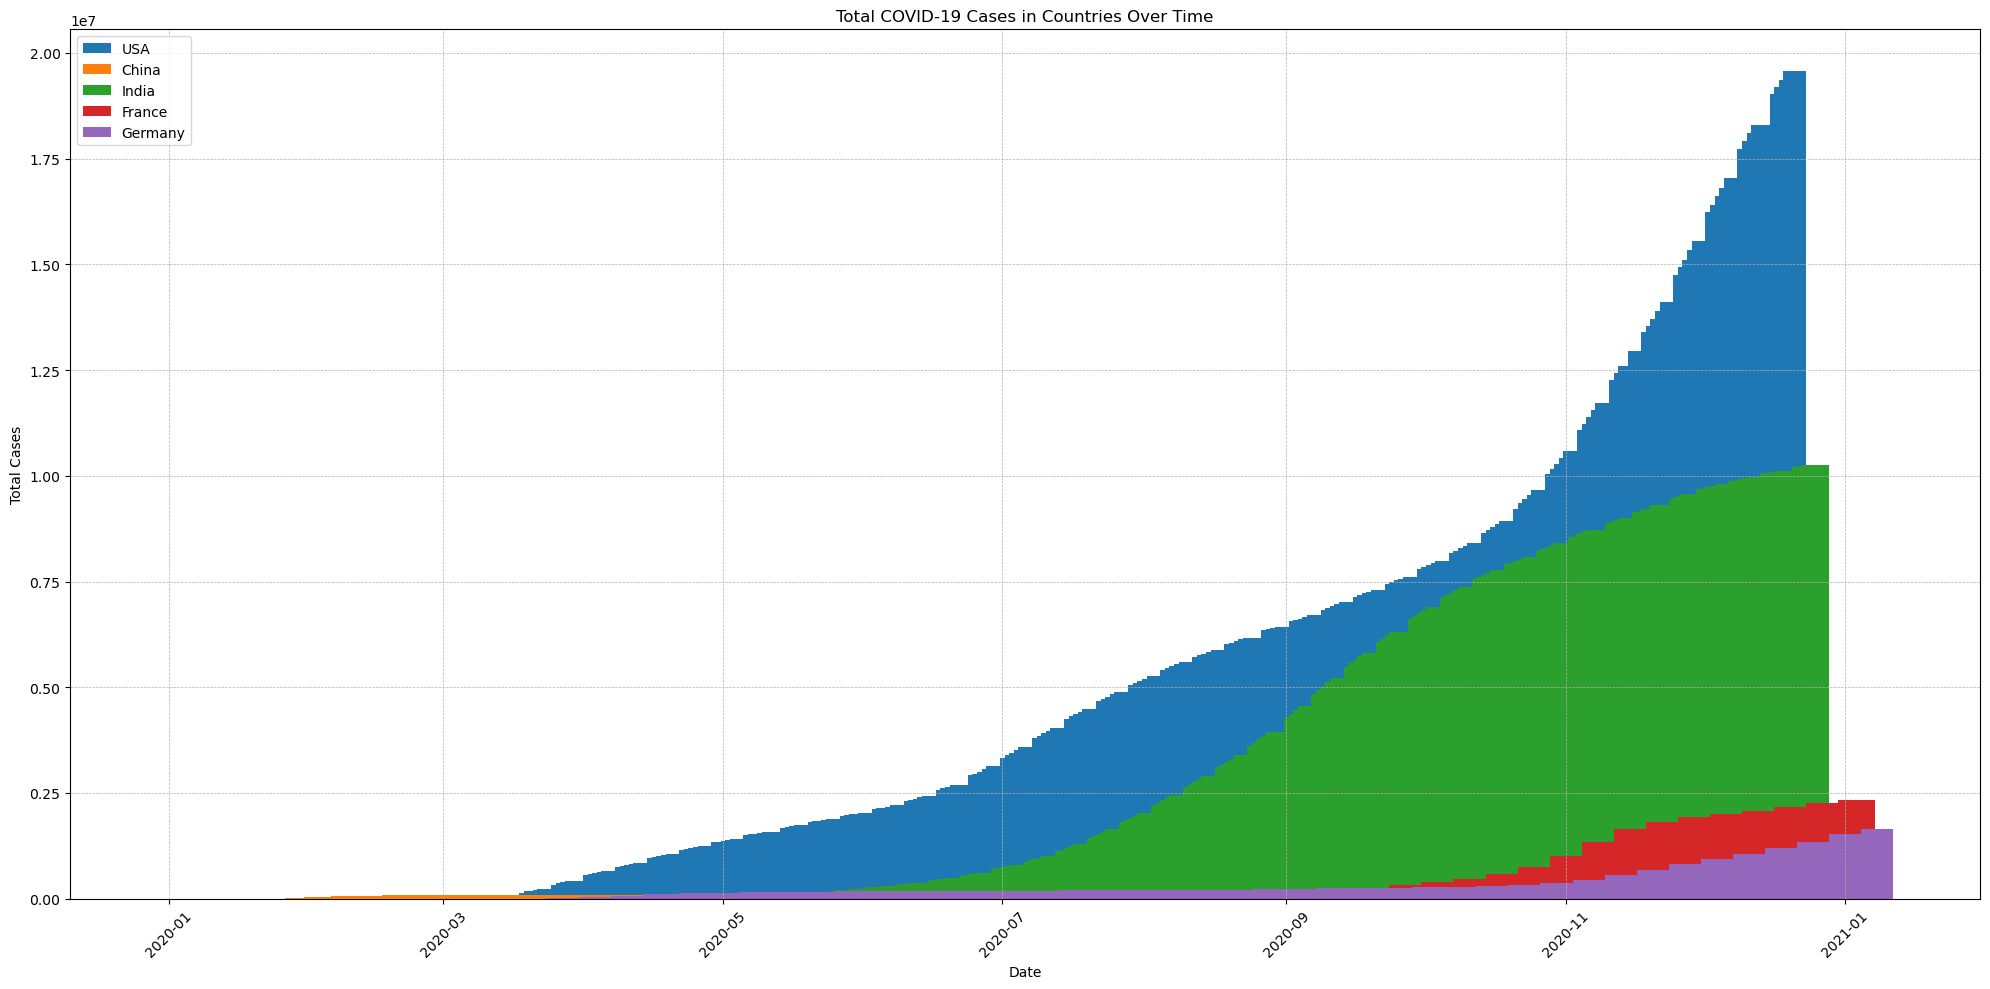

In [84]:
# Total Covid cases/country over time in bar graph 

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
india_merged_data['Date'] = pd.to_datetime(india_merged_data['Date'])
france_merged_data['Date'] = pd.to_datetime(france_merged_data['Date'])
germany_merged_data['Date'] = pd.to_datetime(germany_merged_data['Date'])

fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 5  

ax.bar(us_merged_data['Date'] - pd.Timedelta(days=10), us_merged_data['Total Cases'], width=bar_width, label='USA')
ax.bar(china_merged_data['Date'] - pd.Timedelta(days=5), china_merged_data['Total Cases'], width=bar_width, label='China')
ax.bar(india_merged_data['Date'] - pd.Timedelta(days=5), india_merged_data['Total Cases'], width=bar_width, label='India')
ax.bar(france_merged_data['Date'] + pd.Timedelta(days=5), france_merged_data['Total Cases'], width=bar_width, label='France')
ax.bar(germany_merged_data['Date'] + pd.Timedelta(days=10), germany_merged_data['Total Cases'], width=bar_width, label='Germany')

ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
ax.set_title('Total COVID-19 Cases in Countries Over Time')
ax.legend(loc='upper left')

plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show() 

/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3607829932.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3607829932.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3607829932.py:11: SettingWithCopyWarning: 
A value is tr

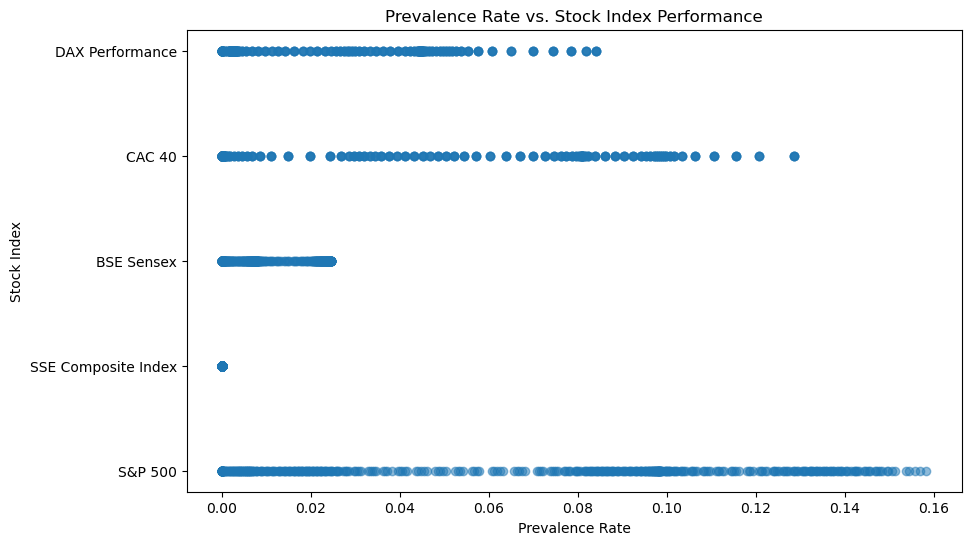

In [49]:
#Prevalence rate based on country stock index

merged_indices_and_covid['Prevalence Rate'] = merged_indices_and_covid['Total Cases'] / merged_indices_and_covid['Population']

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
india_merged_data['Date'] = pd.to_datetime(india_merged_data['Date'])
france_merged_data['Date'] = pd.to_datetime(france_merged_data['Date'])
germany_merged_data['Date'] = pd.to_datetime(germany_merged_data['Date'])

merged_indices_and_covid = merged_indices_and_covid.dropna(subset=['Prevalence Rate', 'Index'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_indices_and_covid['Prevalence Rate'], merged_indices_and_covid['Index'], alpha=0.5)
plt.xlabel('Prevalence Rate')
plt.ylabel('Stock Index')
plt.title('Prevalence Rate based on Stock Index Performance')
plt.show()



/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/716318888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/716318888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/716318888.py:11: SettingWithCopyWarning: 
A value is tryin

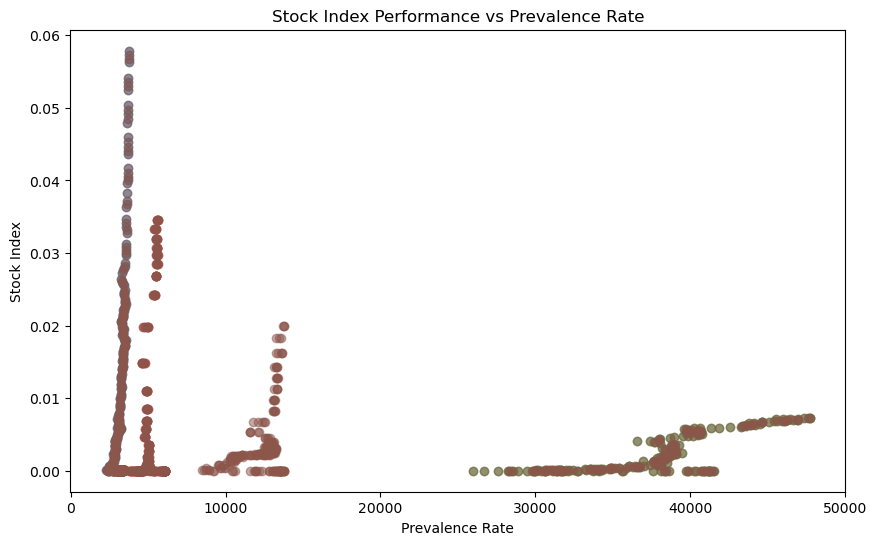

In [80]:
Prevalence rate vs Stock index comparison

merged_indices_and_covid['Prevalence Rate'] = merged_indices_and_covid['Total Cases'] / merged_indices_and_covid['Population']

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Index"] == "S&P 500"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Index"] == "SSE Composite Index"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Index"] == "BSE Sensex"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Index"] == "CAC 40"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Index"] == "Dax Performance"]

us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
india_merged_data['Date'] = pd.to_datetime(india_merged_data['Date'])
france_merged_data['Date'] = pd.to_datetime(france_merged_data['Date'])
germany_merged_data['Date'] = pd.to_datetime(germany_merged_data['Date'])

merged_indices_and_covid = merged_indices_and_covid.dropna(subset=['Prevalence Rate', 'Close'])

plt.figure(figsize=(10, 6))
plt.scatter(us_merged_data['Close'], us_merged_data['Prevalence Rate'], label='USA', alpha=0.5)
plt.scatter(china_merged_data['Close'], china_merged_data['Prevalence Rate'], label='China', alpha=0.5)
plt.scatter(india_merged_data['Close'], india_merged_data['Prevalence Rate'], label='India', alpha=0.5)
plt.scatter(france_merged_data['Close'], france_merged_data['Prevalence Rate'], label='France', alpha=0.5)
plt.scatter(germany_merged_data['Close'], germany_merged_data['Prevalence Rate'], label='Germany', alpha=0.5)

plt.scatter(merged_indices_and_covid['Close'], merged_indices_and_covid['Prevalence Rate'], alpha=0.5)
plt.xlabel('Prevalence Rate')
plt.ylabel('Stock Index')
plt.title('Stock Index Performance vs Prevalence Rate')
plt.show()

/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/592112595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/592112595.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/592112595.py:11: SettingWithCopyWarning: 
A value is tryin

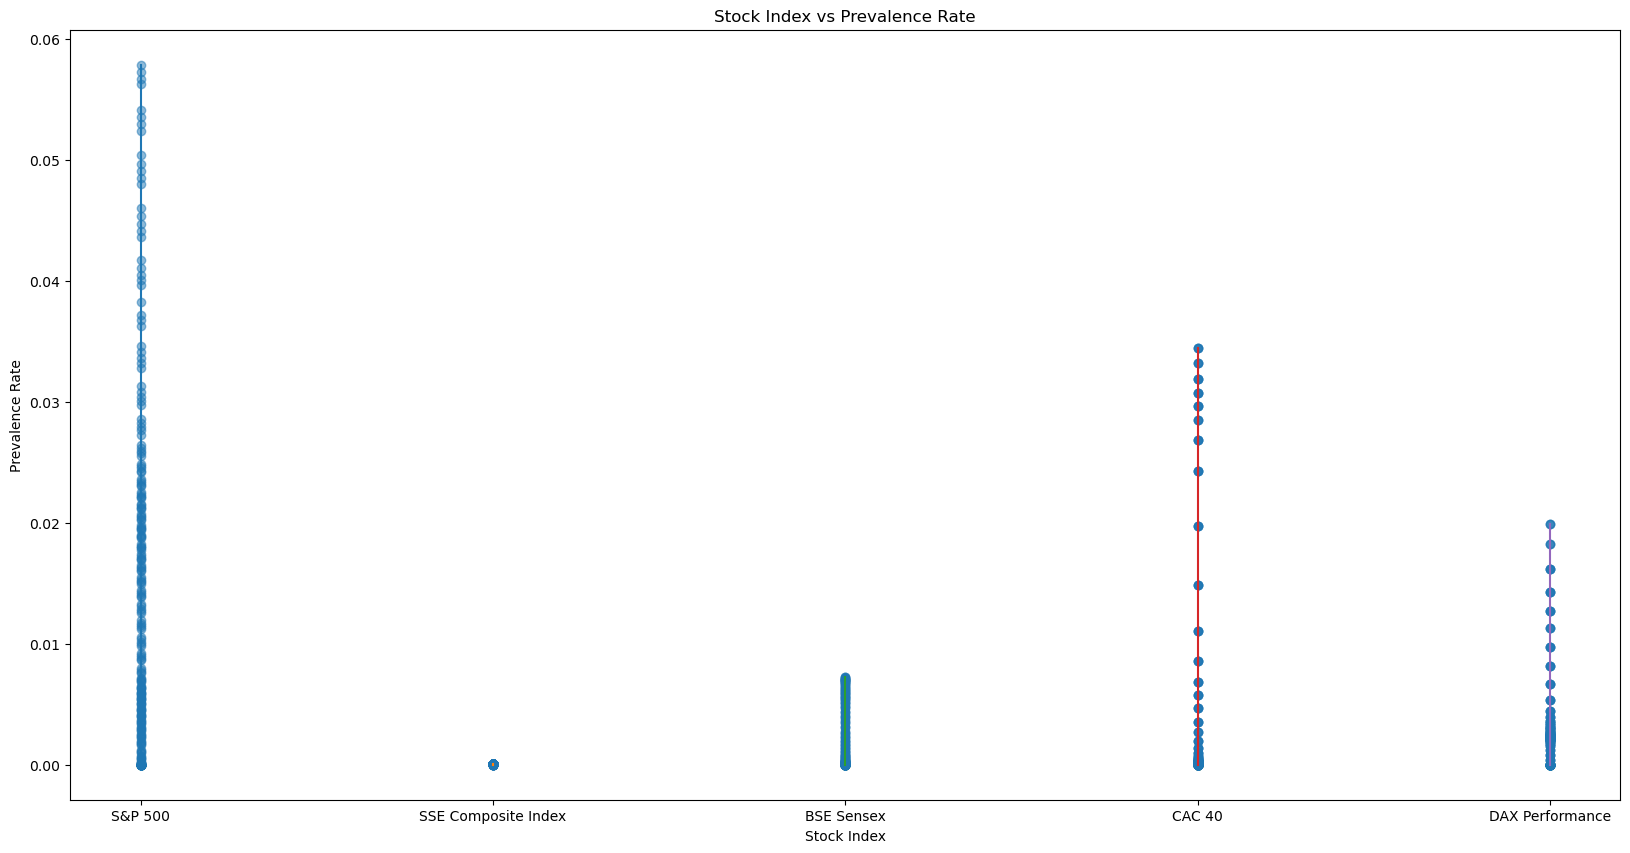

In [68]:
merged_indices_and_covid['Prevalence Rate'] = merged_indices_and_covid['Total Cases'] / merged_indices_and_covid['Population']

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
india_merged_data['Date'] = pd.to_datetime(india_merged_data['Date'])
france_merged_data['Date'] = pd.to_datetime(france_merged_data['Date'])
germany_merged_data['Date'] = pd.to_datetime(germany_merged_data['Date'])

merged_indices_and_covid = merged_indices_and_covid.dropna(subset=['Prevalence Rate', 'Index'])

plt.figure(figsize=(20, 10))
plt.plot(us_merged_data['Index'], us_merged_data['Prevalence Rate'], label='USA')
plt.plot(china_merged_data['Index'], china_merged_data['Prevalence Rate'], label='China')
plt.plot(india_merged_data['Index'], india_merged_data['Prevalence Rate'], label='India')
plt.plot(france_merged_data['Index'], france_merged_data['Prevalence Rate'], label='France')
plt.plot(germany_merged_data['Index'], germany_merged_data['Prevalence Rate'], label='Germany')

plt.scatter(merged_indices_and_covid['Index'], merged_indices_and_covid['Prevalence Rate'], alpha=0.5)
plt.xlabel('Stock Index')
plt.ylabel('Prevalence Rate')
plt.title('Stock Index vs Prevalence Rate')
plt.show()


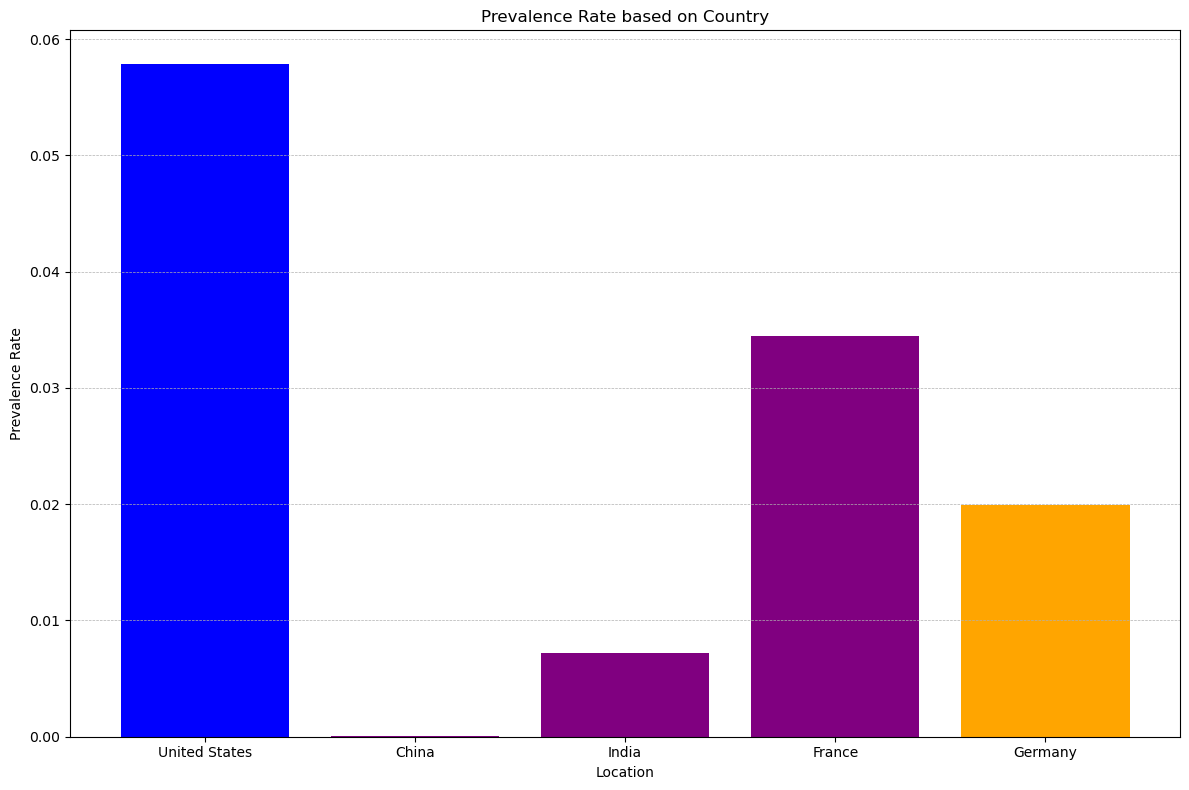

In [83]:
merged_indices_and_covid['Prevalence Rate'] = merged_indices_and_covid['Total Cases'] / merged_indices_and_covid['Population']

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

prevalence_data = {
    'Country': ['USA', 'China', 'India', 'France', 'Germany'],
    'Prevalence Rate': [
        us_merged_data['Prevalence Rate'].mean(),
        china_merged_data['Prevalence Rate'].mean(),
        india_merged_data['Prevalence Rate'].mean(),
        france_merged_data['Prevalence Rate'].mean(),
        germany_merged_data['Prevalence Rate'].mean()
    ]
}

plt.figure(figsize=(12, 8))
plt.bar(merged_indices_and_covid['Location'], merged_indices_and_covid['Prevalence Rate'], color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel('Location')
plt.ylabel('Prevalence Rate')
plt.title('Prevalence Rate based on Country')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




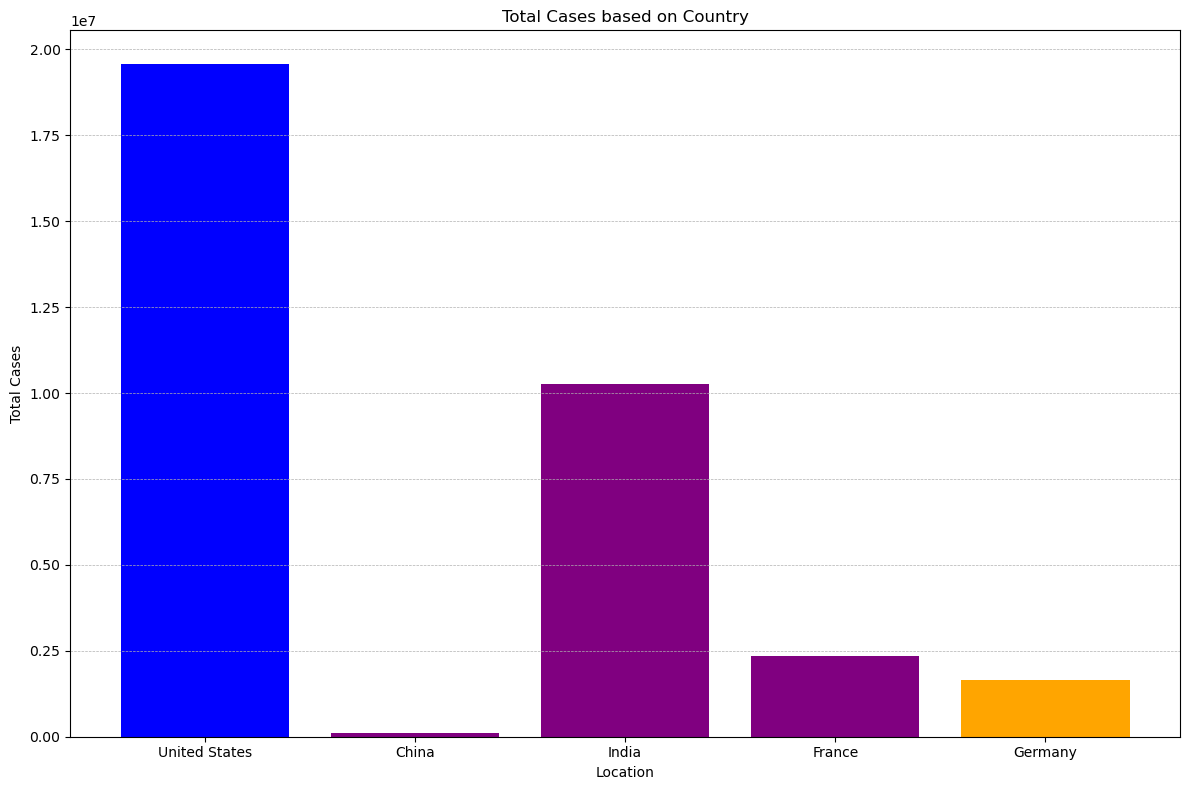

In [85]:
merged_indices_and_covid['Prevalence Rate'] = merged_indices_and_covid['Total Cases'] / merged_indices_and_covid['Population']

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

prevalence_data = {
    'Country': ['USA', 'China', 'India', 'France', 'Germany'],
    'Prevalence Rate': [
        us_merged_data['Prevalence Rate'].mean(),
        china_merged_data['Prevalence Rate'].mean(),
        india_merged_data['Prevalence Rate'].mean(),
        france_merged_data['Prevalence Rate'].mean(),
        germany_merged_data['Prevalence Rate'].mean()
    ]
}

plt.figure(figsize=(12, 8))
plt.bar(merged_indices_and_covid['Location'], merged_indices_and_covid['Total Cases'], color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.title('Total Cases based on Country')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3795688682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3795688682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
/var/folders/tz/nqby0pvn6llfbd7c3rtk0k280000gn/T/ipykernel_69039/3795688682.py:11: SettingWithCopyWarning: 
A value is tr

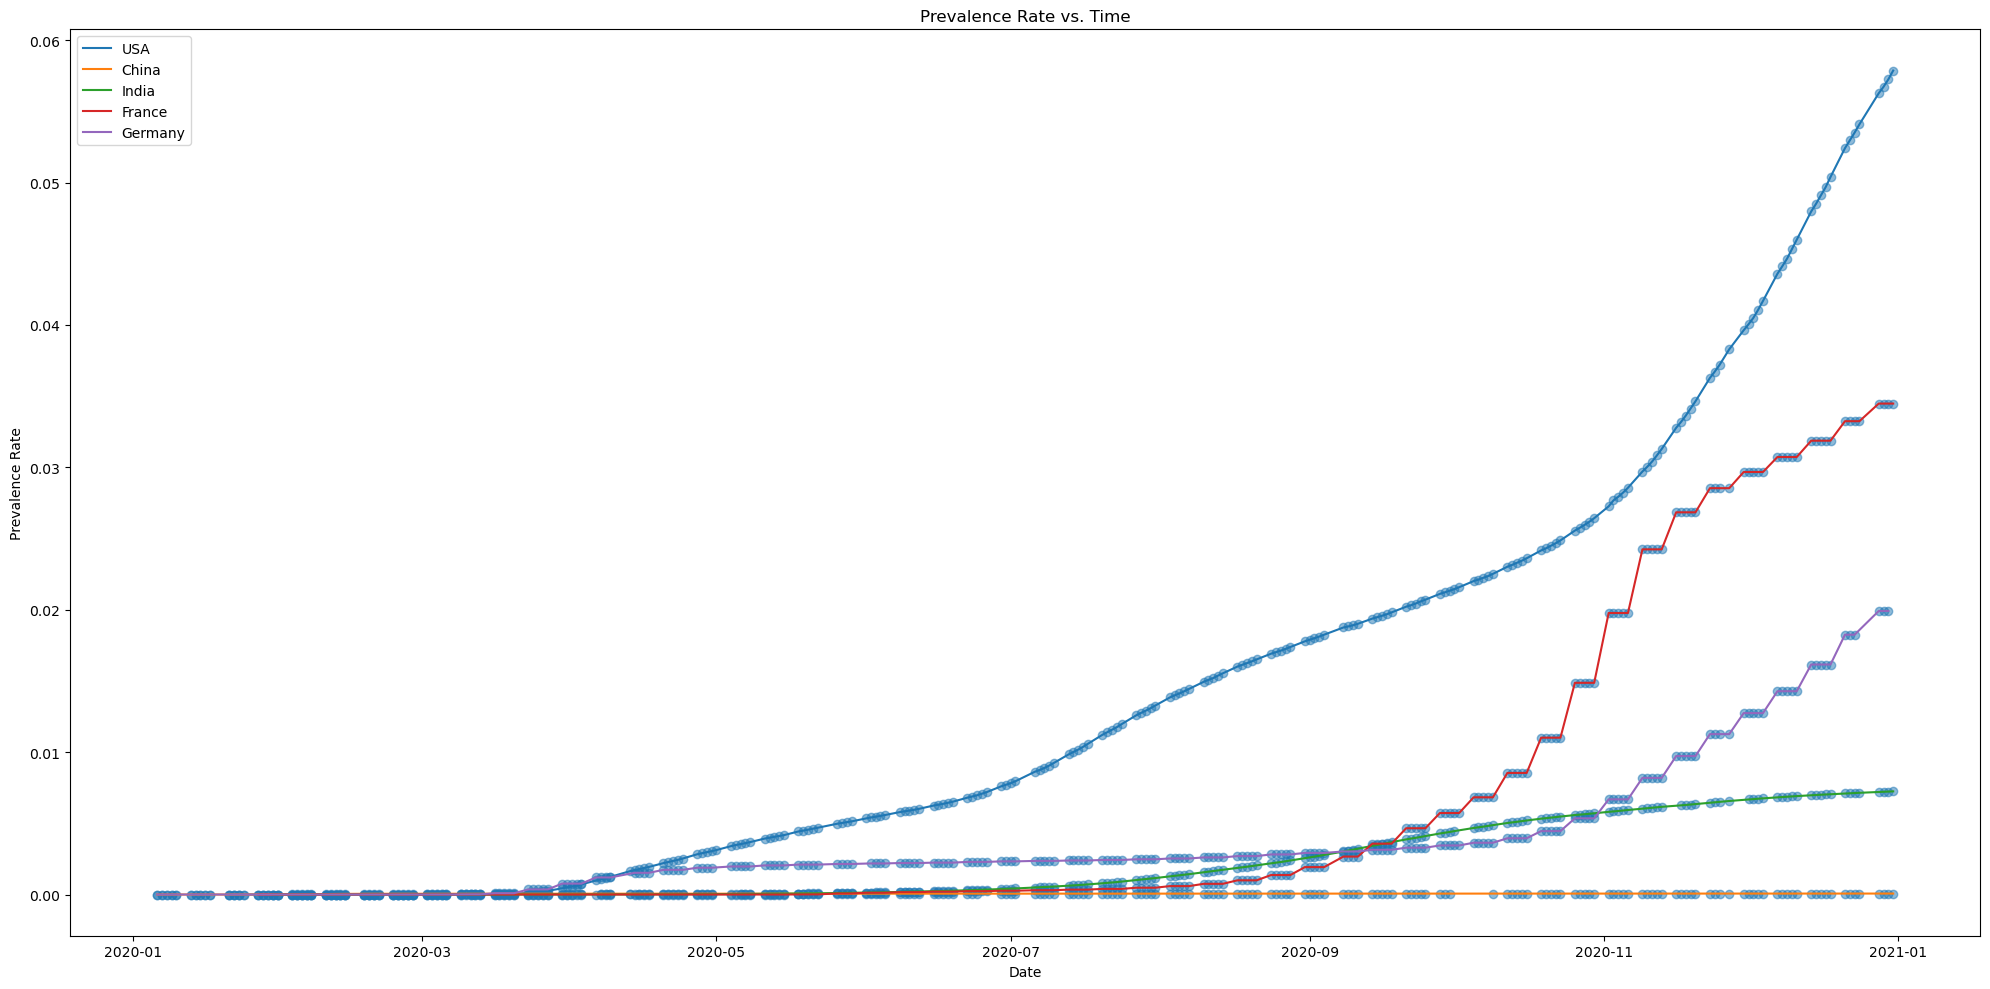

In [56]:
#Prevalence Rate over Time

merged_indices_and_covid['Prevalence Rate'] = merged_indices_and_covid['Total Cases'] / merged_indices_and_covid['Population']

us_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "United States"]
china_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "China"]
india_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "India"]
france_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "France"]
germany_merged_data = merged_indices_and_covid[merged_indices_and_covid["Location"] == "Germany"]

us_merged_data['Date'] = pd.to_datetime(us_merged_data['Date'])
china_merged_data['Date'] = pd.to_datetime(china_merged_data['Date'])
india_merged_data['Date'] = pd.to_datetime(india_merged_data['Date'])
france_merged_data['Date'] = pd.to_datetime(france_merged_data['Date'])
germany_merged_data['Date'] = pd.to_datetime(germany_merged_data['Date'])

merged_indices_and_covid = merged_indices_and_covid.dropna(subset=['Date', 'Prevalence Rate'])

plt.figure(figsize=(20, 10))
plt.plot(us_merged_data['Date'], us_merged_data['Prevalence Rate'], label='USA')
plt.plot(china_merged_data['Date'], china_merged_data['Prevalence Rate'], label='China')
plt.plot(india_merged_data['Date'], india_merged_data['Prevalence Rate'], label='India')
plt.plot(france_merged_data['Date'], france_merged_data['Prevalence Rate'], label='France')
plt.plot(germany_merged_data['Date'], germany_merged_data['Prevalence Rate'], label='Germany')

markers = ['o', 's', 'D', '^', 'P']
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.scatter(merged_indices_and_covid['Date'], merged_indices_and_covid['Prevalence Rate'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Prevalence Rate')
plt.title('Prevalence Rate vs. Time')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

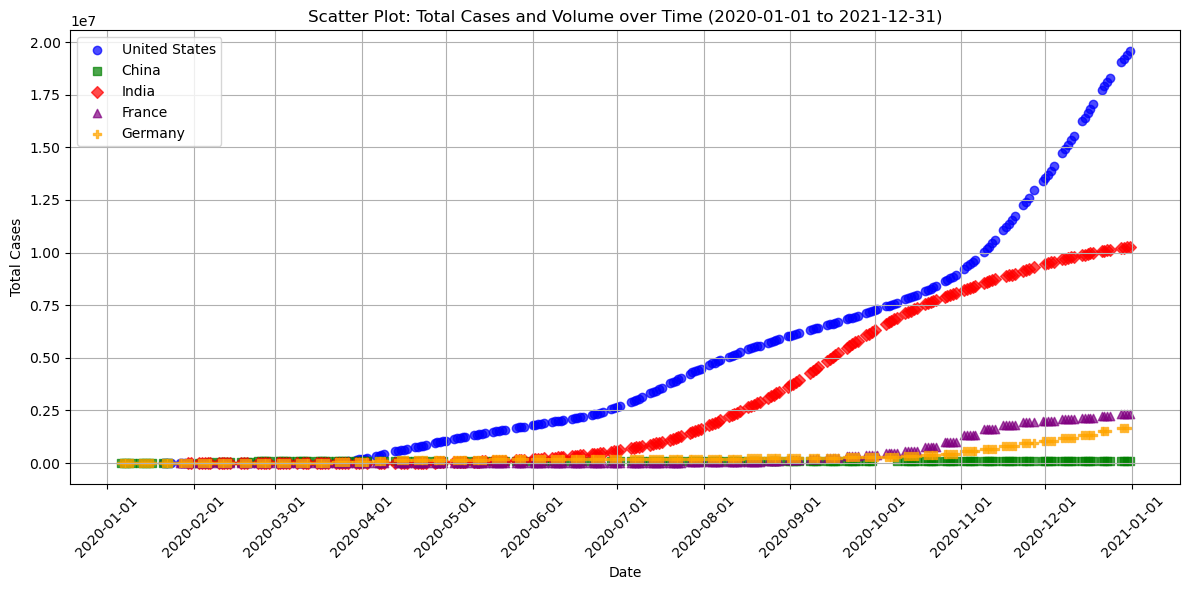

Sums for each location:
        Location  Total Cases         Volume
0          China     18746660     65432400.0
1         France    103637047  22271072000.0
2        Germany     73964888  25124626200.0
3          India    722275794      4558700.0
4  United States   1179442762  1202001830000

Location: United States
Closing price on February 3, 2020: 3249
Closing price on July 1, 2020: 3116
Closing price on December 30, 2020: 3732

Location: China
Closing price on February 3, 2020: 2747
Closing price on July 1, 2020: 3026
Closing price on December 30, 2020: 3414

Location: India
Closing price on February 3, 2020: 39872
Closing price on July 1, 2020: 35414
Closing price on December 30, 2020: 47746

Location: France
Closing price on February 3, 2020: 5833
Closing price on July 1, 2020: 4927
Closing price on December 30, 2020: 5599

Location: Germany
Closing price on February 3, 2020: 13045
Closing price on July 1, 2020: 12261
Closing price on December 30, 2020: 13719


In [52]:
# Filter data for date range from 2020-01-01 to 2021-12-31
start_date = '2020-01-01'
end_date = '2020-12-31'
merged_indices_and_covid['Date'] = pd.to_datetime(merged_indices_and_covid['Date'])
merged_indices_and_covid = merged_indices_and_covid[(merged_indices_and_covid['Date'] >= start_date) & (merged_indices_and_covid['Date'] <= end_date)]

# Drop rows with NaN values in 'Total Cases' and 'Volume'
merged_indices_and_covid.dropna(subset=['Total Cases', 'Volume'], inplace=True)

# Convert 'Total Cases' to integer (assuming it's meant to be an integer)
merged_indices_and_covid['Total Cases'] = merged_indices_and_covid['Total Cases'].astype(int)

# Plotting a scatter plot with 'Date' on x-axis, 'Total Cases' and 'Volume' on y-axis
plt.figure(figsize=(12, 6))

# Define markers and colors for different locations
markers = ['o', 's', 'D', '^', 'P']
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through unique locations and plot each with different marker and color
for i, (location, color, marker) in enumerate(zip(merged_indices_and_covid['Location'].unique(), colors, markers)):
    location_data = merged_indices_and_covid[merged_indices_and_covid['Location'] == location]
    plt.scatter(location_data['Date'], location_data['Total Cases'], color=color, label=location, marker=marker, alpha=0.7)

# Formatting x-axis to show date labels nicely
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Adding grid, legends, title, and labels
plt.grid(True)
plt.title('Scatter Plot: Total Cases and Volume over Time (2020-01-01 to 2021-12-31)')
plt.xlabel('Date')
plt.ylabel('Total Cases')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing legends
plt.legend(loc='upper left')

# Automatically adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

# Group by 'Location' and calculate sum of 'Total Cases' and 'Volume'
sums_per_location = merged_indices_and_covid.groupby('Location').agg({'Total Cases': 'sum', 'Volume': 'sum'}).reset_index()

# Print the sums for each location
print("Sums for each location:")
print(sums_per_location)

# List of locations
locations = ['United States', 'China', 'India', 'France', 'Germany']

# Loop through each location
for location in locations:
    # Filter for February 3, 2020
    filtered_feb_3_2020 = merged_indices_and_covid[(merged_indices_and_covid['Date'] == '2020-02-03') & (merged_indices_and_covid['Location'] == location)]
    if not filtered_feb_3_2020.empty:
        close_feb_3_2020 = filtered_feb_3_2020['Close'].values[0]
        close_feb_3_2020_rounded = round(close_feb_3_2020)
    else:
        close_feb_3_2020_rounded = None

    # Filter for July 1, 2020
    filtered_july_1_2020 = merged_indices_and_covid[(merged_indices_and_covid['Date'] == '2020-07-01') & (merged_indices_and_covid['Location'] == location)]
    if not filtered_july_1_2020.empty:
        close_july_1_2020 = filtered_july_1_2020['Close'].values[0]
        close_july_1_2020_rounded = round(close_july_1_2020)
    else:
        close_july_1_2020_rounded = None

    # Filter for December 30, 2020
    filtered_dec_30_2020 = merged_indices_and_covid[(merged_indices_and_covid['Date'] == '2020-12-30') & (merged_indices_and_covid['Location'] == location)]
    if not filtered_dec_30_2020.empty:
        close_dec_30_2020 = filtered_dec_30_2020['Close'].values[0]
        close_dec_30_2020_rounded = round(close_dec_30_2020)
    else:
        close_dec_30_2020_rounded = None

    # Print the results
    print()
    print(f"Location: {location}")
    if close_feb_3_2020_rounded is not None:
        print(f"Closing price on February 3, 2020: {close_feb_3_2020_rounded}")
    else:
        print("No data available for February 3, 2020")

    if close_july_1_2020_rounded is not None:
        print(f"Closing price on July 1, 2020: {close_july_1_2020_rounded}")
    else:
        print("No data available for July 1, 2020")

    if close_dec_30_2020_rounded is not None:
        print(f"Closing price on December 30, 2020: {close_dec_30_2020_rounded}")
    else:
        print("No data available for December 30, 2020")

 
    

In [51]:
for location in locations:
    # Filter for February 3, 2020
    filtered_feb_3_2020 = merged_indices_and_covid[(merged_indices_and_covid['Date'] == '2020-02-03') & (merged_indices_and_covid['Location'] == location)]
    if not filtered_feb_3_2020.empty:
        close_feb_3_2020 = filtered_feb_3_2020['Close'].values[0]
    else:
        close_feb_3_2020 = None

    # Filter for December 30, 2020
    filtered_dec_30_2020 = merged_indices_and_covid[(merged_indices_and_covid['Date'] == '2020-12-30') & (merged_indices_and_covid['Location'] == location)]
    if not filtered_dec_30_2020.empty:
        close_dec_30_2020 = filtered_dec_30_2020['Close'].values[0]
    else:
        close_dec_30_2020 = None

    # Calculate percent difference if both values are present
    if close_feb_3_2020 is not None and close_dec_30_2020 is not None:
        percent_difference = ((close_dec_30_2020 - close_feb_3_2020) / close_feb_3_2020) * 100
        percent_difference_rounded = round(percent_difference, 2)  # Round to two decimal places
    else:
        percent_difference_rounded = None

    # Print the results
    print(f"Location: {location}")
    if close_feb_3_2020 is not None:
        print(f"Closing price on February 3, 2020: {close_feb_3_2020:.2f}")
    else:
        print("No data available for February 3, 2020")

    if close_dec_30_2020 is not None:
        print(f"Closing price on December 30, 2020: {close_dec_30_2020:.2f}")
    else:
        print("No data available for December 30, 2020")

    if percent_difference_rounded is not None:
        print(f"Percent difference from February 3, 2020 to December 30, 2020: {percent_difference_rounded}%")
    else:
        print("Unable to calculate percent difference")

    print()

Location: United States
Closing price on February 3, 2020: 3248.92
Closing price on December 30, 2020: 3732.04
Percent difference from February 3, 2020 to December 30, 2020: 14.87%

Location: China
Closing price on February 3, 2020: 2746.61
Closing price on December 30, 2020: 3414.45
Percent difference from February 3, 2020 to December 30, 2020: 24.32%

Location: India
Closing price on February 3, 2020: 39872.31
Closing price on December 30, 2020: 47746.22
Percent difference from February 3, 2020 to December 30, 2020: 19.75%

Location: France
Closing price on February 3, 2020: 5832.51
Closing price on December 30, 2020: 5599.41
Percent difference from February 3, 2020 to December 30, 2020: -4.0%

Location: Germany
Closing price on February 3, 2020: 13045.19
Closing price on December 30, 2020: 13718.78
Percent difference from February 3, 2020 to December 30, 2020: 5.16%

